<a href="https://colab.research.google.com/github/Mr-Rajput801/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised Clustering and Recommendation System
##### **Contribution**    - Individual


Github: https://github.com/Mr-Rajput801/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-ML/tree/main


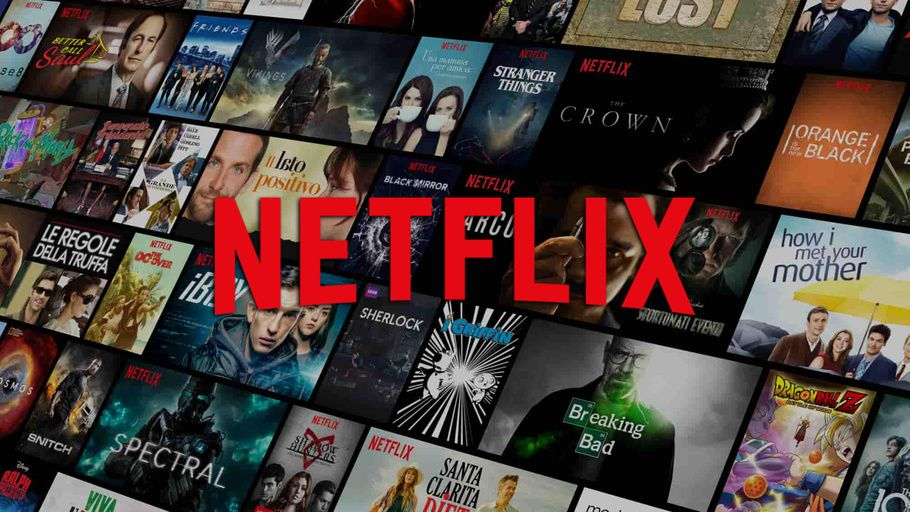

# **GitHub Link -**

https://github.com/Navneet2409/netflix-movies-and-tv-shows-clusteringggg

# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

* There were approximately 7787 records and 11 attributes in the dataset.

* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

* Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Textual Data Preprocessing
7.   Model Impelementation
8.   Recommendation System.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# import your data from drive
from google.colab import drive       #We have imported our dataset from google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load the NETFLIX MOVIES AND TV SHOWS CLUSTERING data set from the drive
netflix_df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Viewing the last 5 rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
netflix_df.shape

(7787, 12)

In [ ]:
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or procedures for collecting data. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [ ]:
# Checking Duplicate Values
value = len(netflix_df[netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there were no duplicate entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

,0
show_id,0.00
type,0.00
title,0.00
director,30.68
cast,9.22
country,6.51
date_added,0.13
release_year,0.00
rating,0.09
duration,0.00


<Axes: >

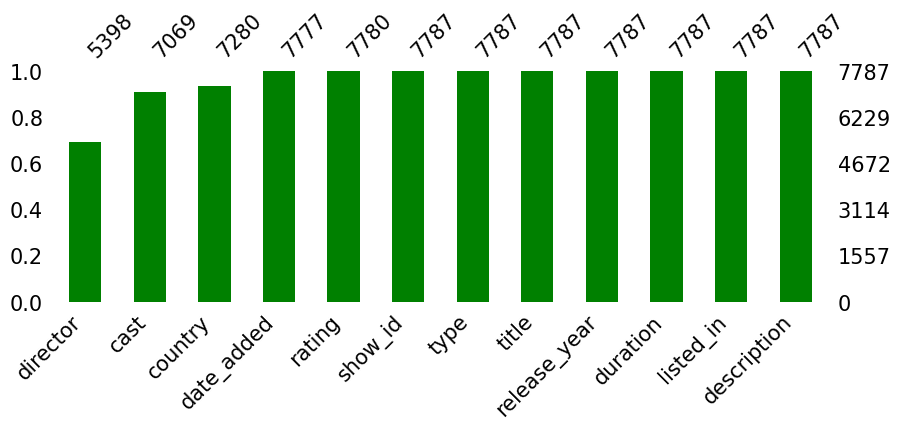

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

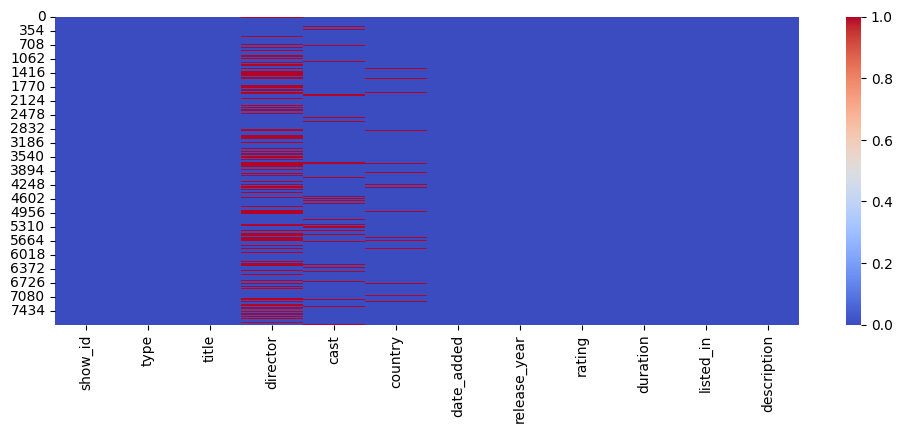

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(netflix_df.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

* There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe    (used to get statistics of numerical columns)
netflix_df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


###  Variables Description

* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

### Unique Values

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",netflix_df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


### Observations:

* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## **4. EDA**

#### **What is EDA?**
* EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.


#### **4.1 Column: 'type'**

In [ ]:
# number of values of different categories in 'type'
netflix_df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


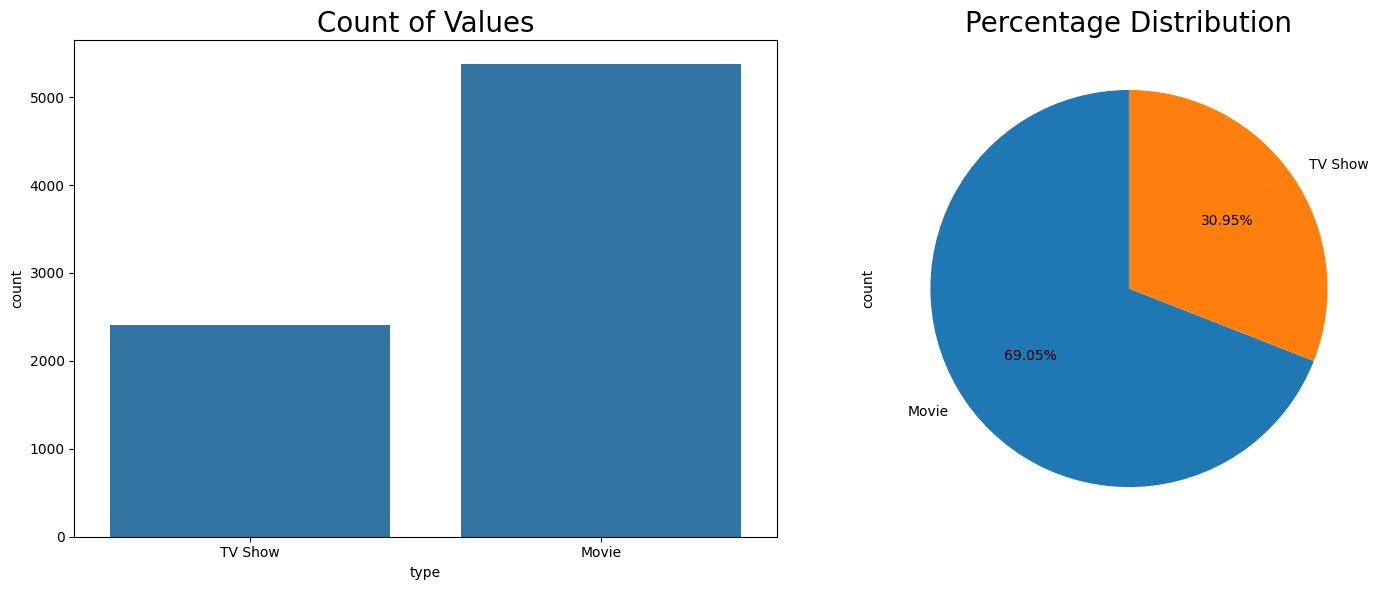

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = netflix_df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

**Observations:**

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

#### **4.2 Column: 'title'**

In [ ]:
# number of unique values
netflix_df['title'].nunique()

7787

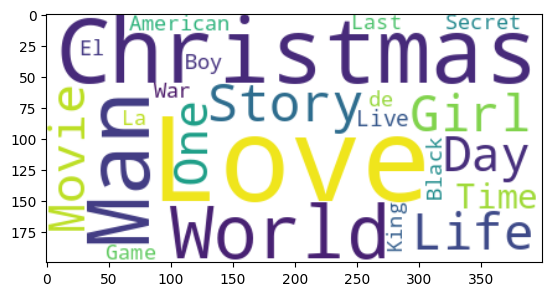

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation:**
* Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

#### **4.3 Column: 'director'**

In [ ]:
print(f'number of unique directors : {netflix_df.director.nunique()}')
print(f'null values in the column : {netflix_df.director.isna().sum()}')

number of unique directors : 4049
null values in the column : 2389


In [ ]:
print(f"Number of Movies directed by directors are : { netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : { netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


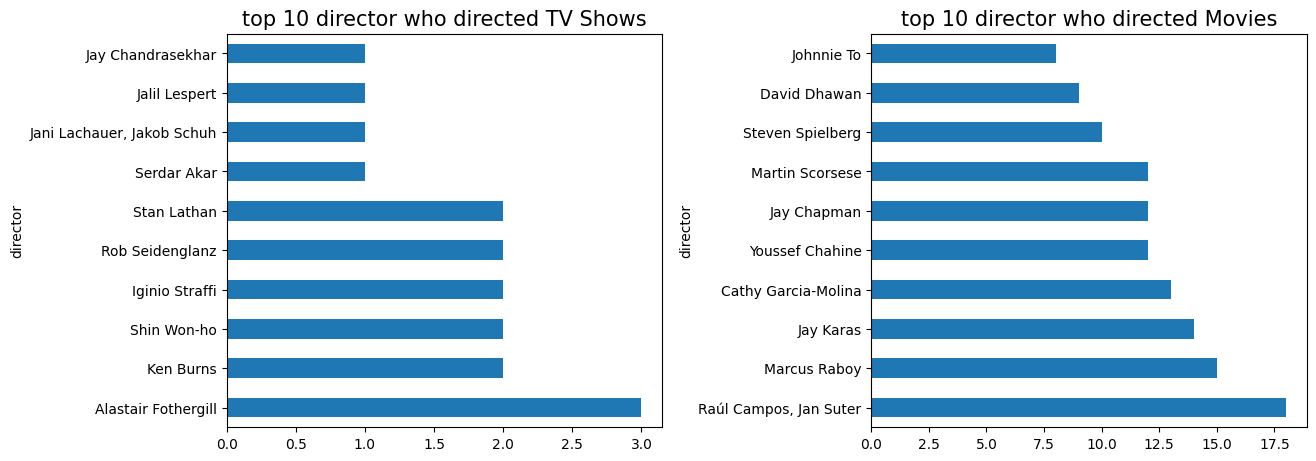

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

#### **4.4 Column: 'cast'**

In [ ]:
netflix_df['cast']

,cast
0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
...,...
7782,"Imad Creidi, Antoinette Turk, Elias Gergi, Car..."
7783,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan..."
7784,Nasty C
7785,"Adriano Zumbo, Rachel Khoo"


In [ ]:
# seperating actors from cast column
cast = netflix_df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

,count
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Akshay Kumar,29
...,...
Archie Alemania,1
Demore Barnes,1
Marty Adams,1
Nicole Boivin,1


In [ ]:
print(f"Number of TV Shows actors: {len(netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


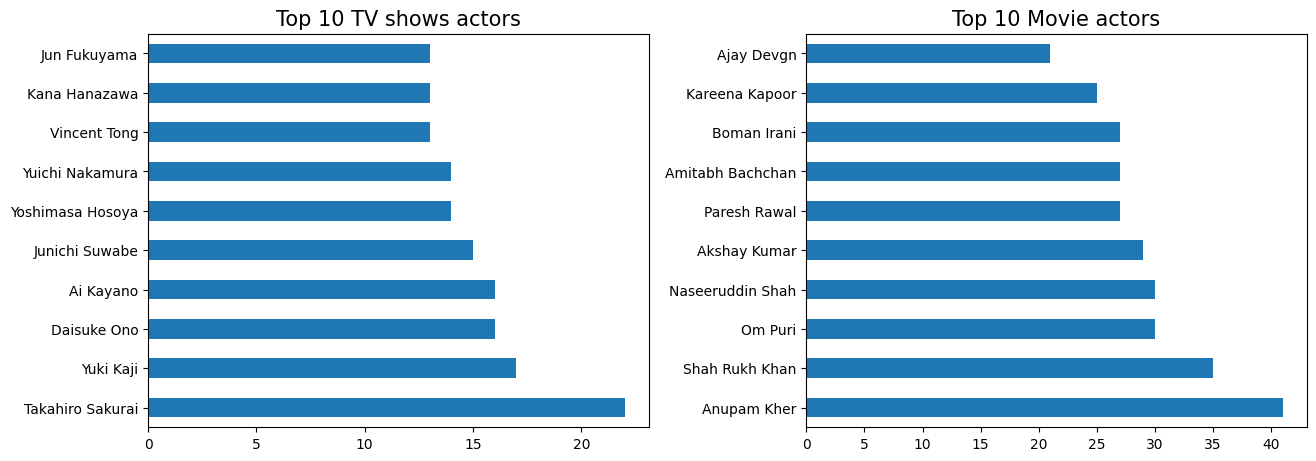

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Observations:**

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### **4.5 Column: 'country'**

In [ ]:
# number of unique values
netflix_df['country'].nunique()

681

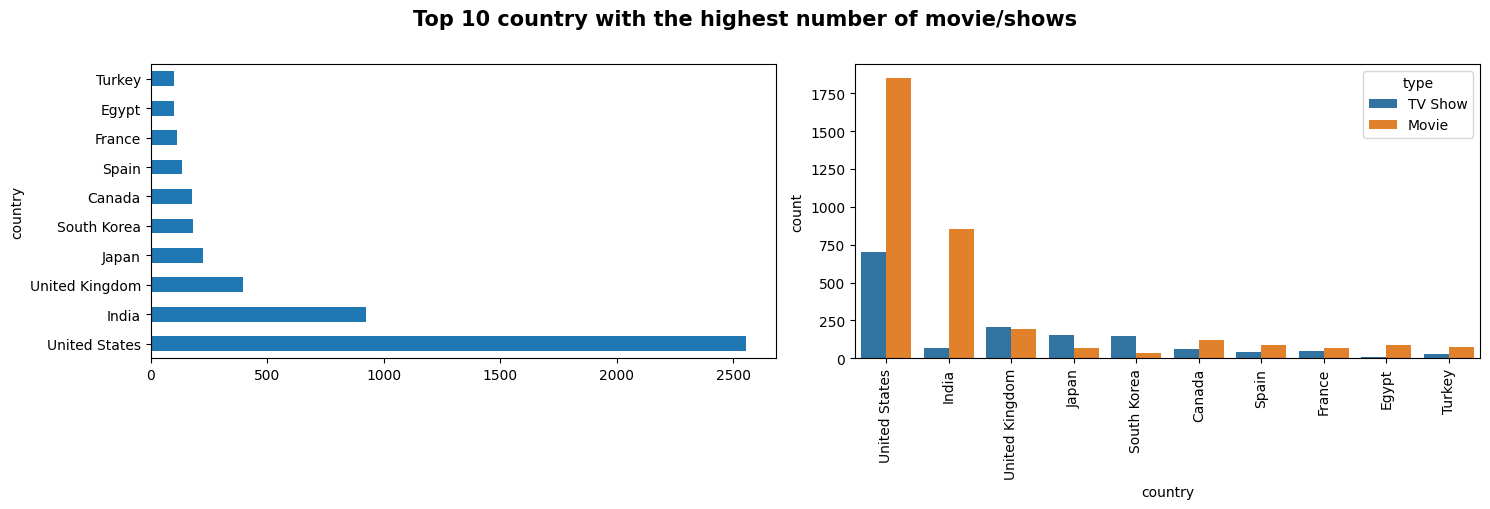

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
netflix_df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=netflix_df, hue='type', order=netflix_df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**
* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.



#### **4.6 Column: 'release_year'**

In [ ]:
# number of unique values
netflix_df['release_year'].nunique()

73

In [ ]:
print(f'Oldest release year : {netflix_df.release_year.min()}')
print(f'Latest release year : {netflix_df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


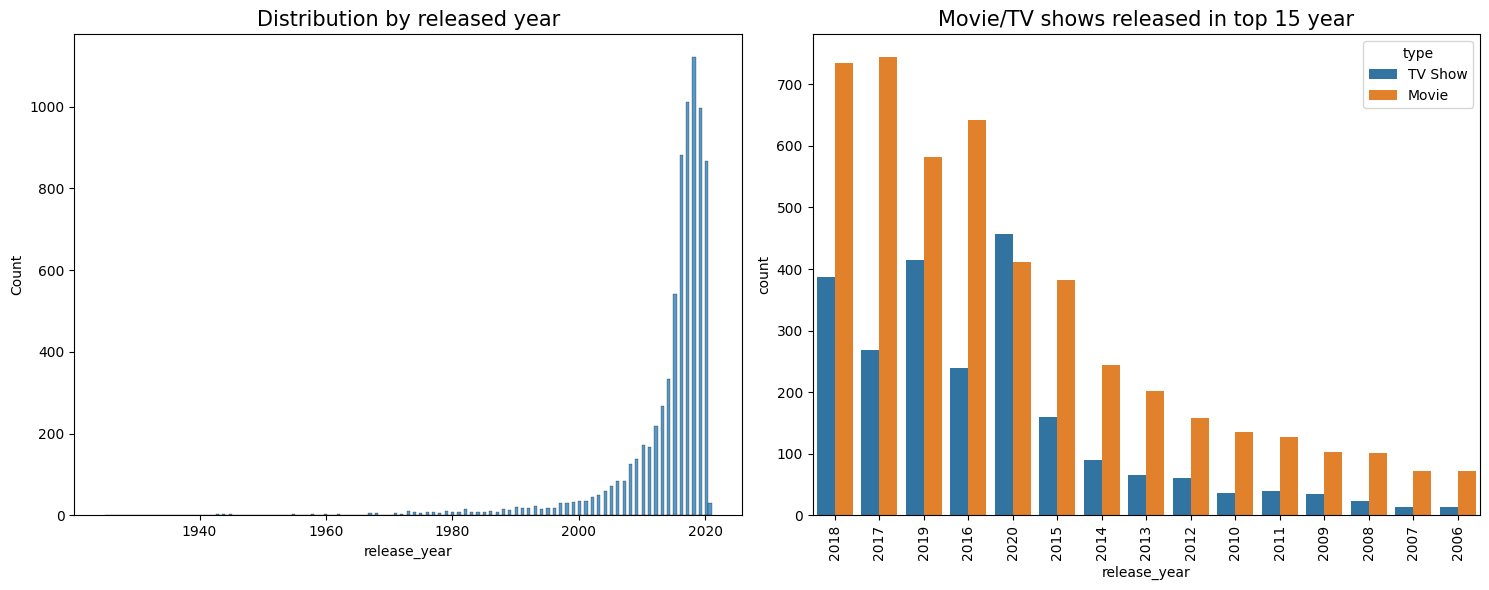

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

#### **4.7 Column: 'rating'**

In [ ]:
# number of unique values
netflix_df.rating.nunique()

14

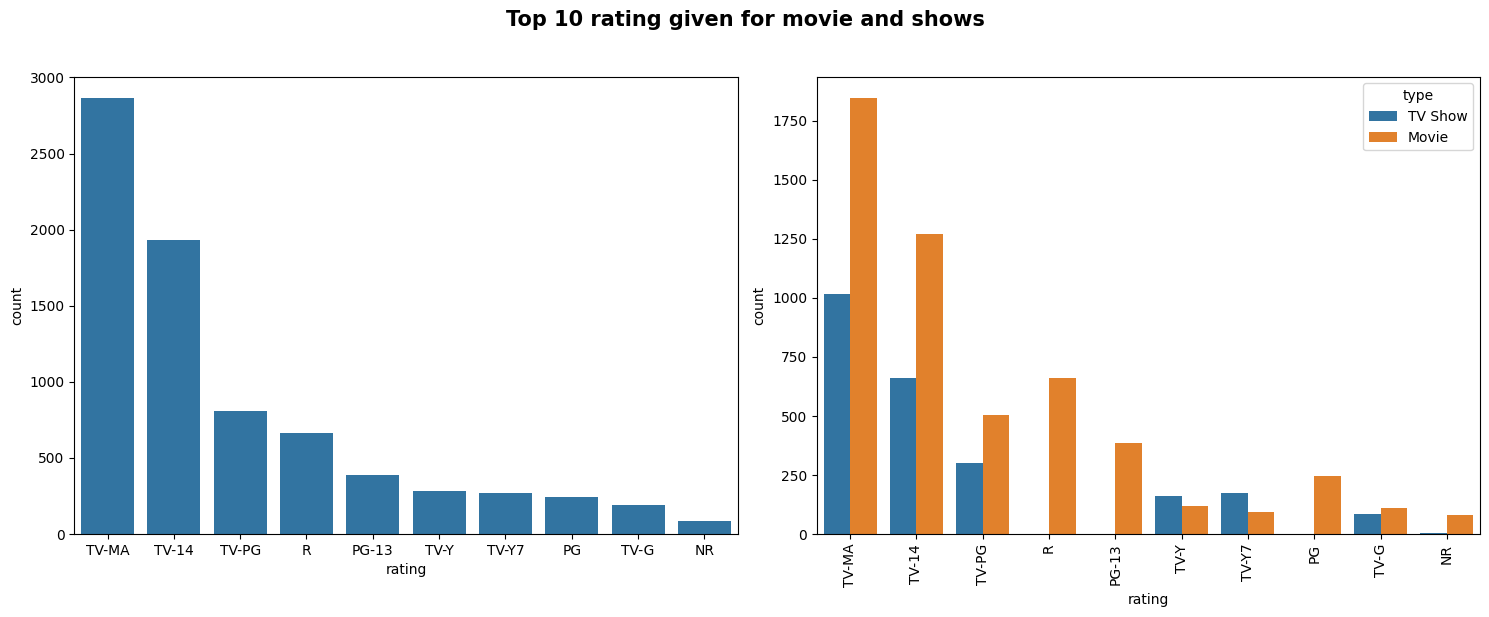

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### **4.8 Column: 'listed_in'**

In [ ]:
netflix_df['listed_in'].head()

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas


Because this column is a genre column, in order to count the genres, we must separate them.

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


In [ ]:
# number of genres present in dataset
len(genres)

42

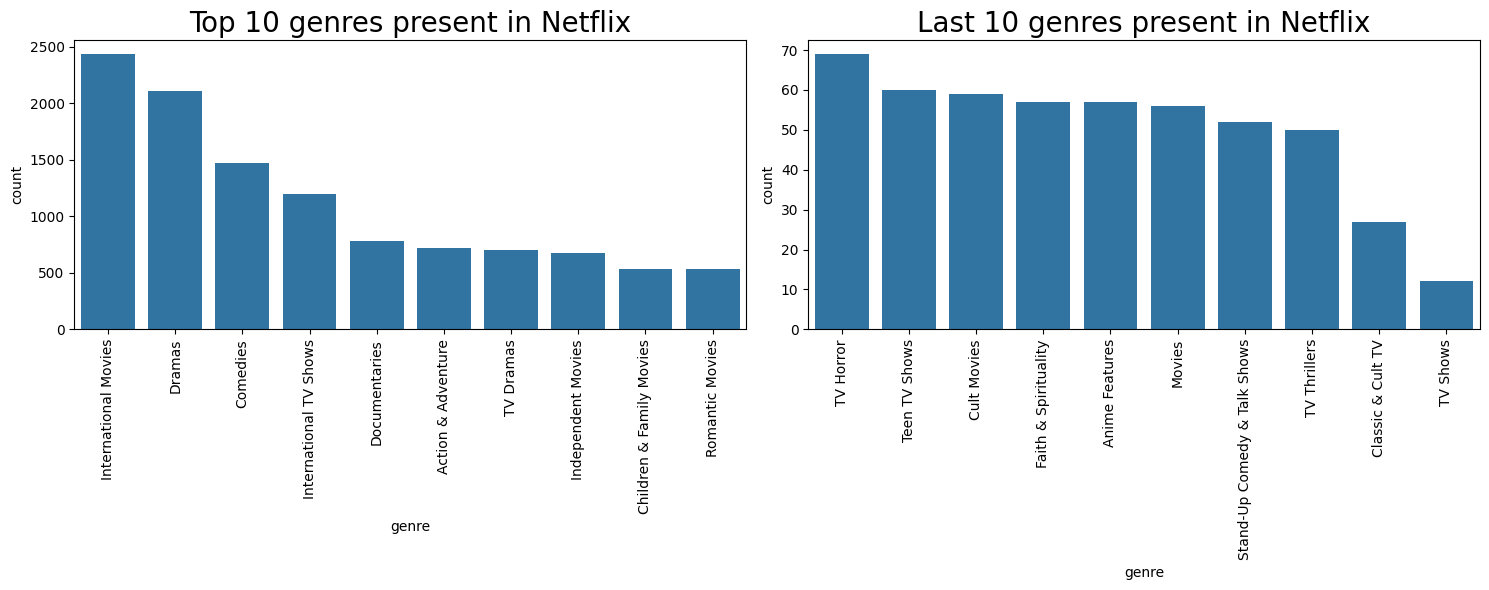

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

#### **4.9 Column: 'description'**

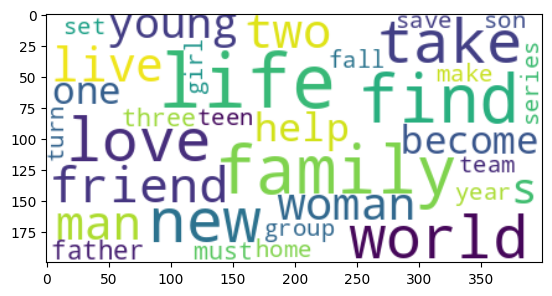

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation:**
* The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **Duplicate Values**

In [ ]:
# counting duplicate values
netflix_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **Missing Values**

In [ ]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

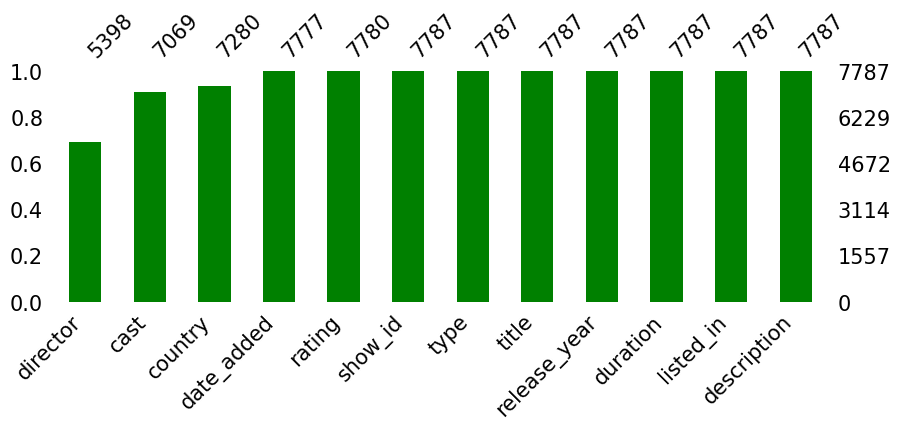

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(netflix_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

,0
show_id,0.00
type,0.00
title,0.00
director,30.68
cast,9.22
country,6.51
date_added,0.13
release_year,0.00
rating,0.09
duration,0.00


**Handling Missing Values**
* The "empty string" can be used to replace the missing values in the director, cast, and country attributes.
* There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### **Handling Outliers**

<Axes: >

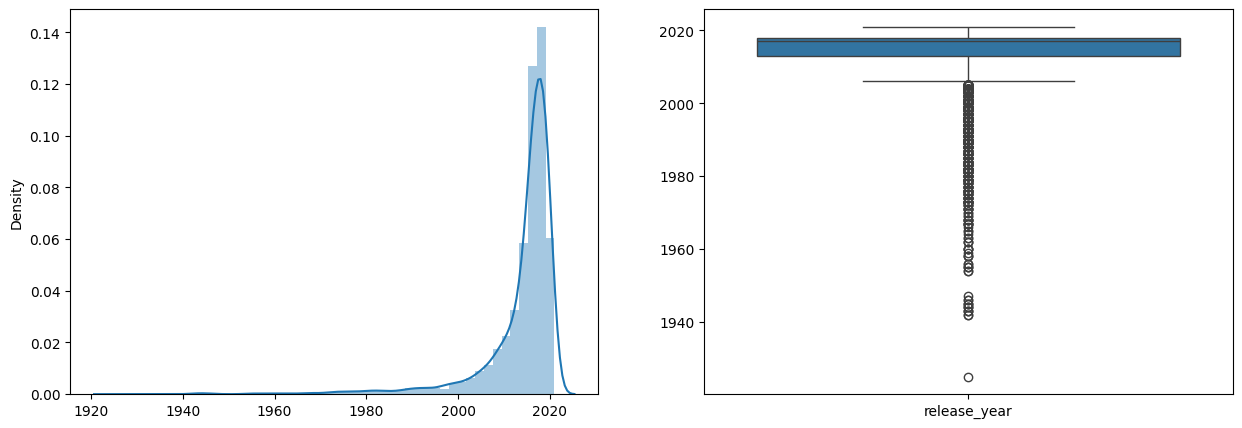

In [ ]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=netflix_df, ax=ax[1])


**Handling Outliers**
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

## **6.Textual Data Preprocessing**

#### **What is textual data preprocessing?**
* Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

#### **Modeling Approach**
1.   Choose the attributes that you want to cluster.
2.   Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
3.   Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
4.   Tokenization: Breaking the text into smaller units, such as sentences or words.
5.   Dimensionality reduction.
6.   Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
7.   Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

### **6.1 Selecting Attributes**

In [ ]:
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


We will cluster the Netflix movies and TV shows into groups based on the following textual characteristics:
* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [ ]:
# creating tags column using all text column which one is used for model building purpose.
netflix_df['text_data'] = netflix_df['director'] + netflix_df['cast'] + netflix_df['country'] + \
                     netflix_df['rating'] + netflix_df['listed_in'] + netflix_df['description']


In [ ]:
# checking the first row
netflix_df['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* We were able to successfully consolidate all of the required data into a single column.

### **6.2 Removing Stop words and Lower Casing.**

In natural language processing (NLP) tasks, removing stop words and lowercasing words are common pre-processing steps.
* **Stop words Removal:**  Words such as "a," "an," "the," and "is," are words that are commonly used in a language but do not convey much meaning. These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

* **Lowercasing:** It is the process of converting all the words in a text to lowercase. This can be useful in tasks such as information retrieval or text classification where case differences are not important and also can reduce the size of the vocabulary making it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [ ]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [ ]:
# applying stopwords function.
netflix_df['text_data'] = netflix_df['text_data'].apply(stopwords)

In [ ]:
# checking the first row again
netflix_df['text_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

* We have successfully changed the corpus to lowercase and removed all stopwords.

### **6.3 Removing Punctuations**

Removing punctuation is the process of removing any punctuation marks (e.g., periods, commas, exclamation points, etc.) from text data. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis, as punctuation marks often do not carry much meaning and can add noise to the data. Removing punctuation can also make it easier to tokenize text into words or sentences, as punctuation marks often act as delimiters between words or sentences. Additionally, removing punctuation can also help in reducing the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms. It can be done using python libraries such as string, re, and nltk.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# applying remove_punctuation function
netflix_df['text_data'] = netflix_df['text_data'].apply(remove_punctuation)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

* We have effectively eliminate all the punctuation marks from the corpus.

### **6.4 Stemming**

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

* We will utilize **SnowballStemmer** to construct a meaningful word from a word corpus.

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# appying stemming function
netflix_df['text_data'] = netflix_df['text_data'].apply(stemming)

In [ ]:
# checking the first row after the process
netflix_df['text_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

* We have successfully utilized the stemming process.

### **6.5 Text Vectorization**

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

* We will be using the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.
* IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.
* The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(netflix_df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(netflix_df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


### **6.6 Dimensionality Reduction**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

* There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.
* We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [78]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

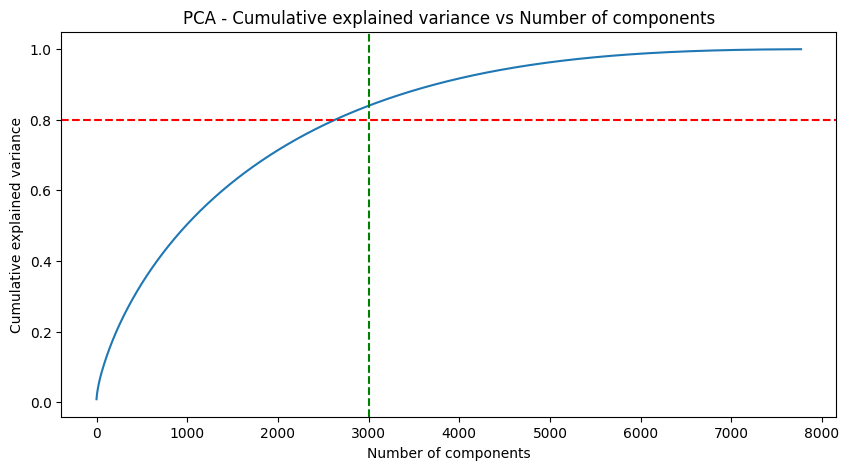

In [79]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.
* 3000 components alone account for more than 80% of the variance.
* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [ ]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

## **7. Model Implementation**

### **7.1 K-Means Clustering**

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

* We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

In [ ]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 6 clusters.
* Building 6 clusters using the k-means clustering algorithm.

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

In [ ]:
# Adding a kmeans cluster number attribute
netflix_df['kmeans_cluster'] = kmeans.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* **Successfully built 6 clusters using the k-means clustering algorithm.**

#### **Building wordclouds for different clusters in K-Means Clustering**

In [ ]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = netflix_df[['kmeans_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "description" column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

**Word Cloud on "director" column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

**Word Cloud on "listed_in" (genre) col for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

**Word Cloud on "country" column column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

**Word Cloud on "title" column column for different cluster**

In [ ]:
for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

### **7.2 Hierarchical clustering**

Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

In [ ]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

**At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.**

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

In [ ]:
# Adding a hierarchical cluster number attribute
netflix_df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
netflix_df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=netflix_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

#### **Building wordclouds for different clusters in hierarchical Clustering**

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  netflix_df_wordcloud = netflix_df[['hierarchical_cluster',column_name]].dropna()
  netflix_df_wordcloud = netflix_df_wordcloud[netflix_df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in netflix_df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

**Word Cloud on "description" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "country" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

## **8. Recommendation System**

A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

* Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
* The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.
* We can use cosine similarity to determine the shows' similarity scores.
* By dividing the dot product of the two vectors by their magnitude values, the similarity between A and B can be calculated. Simply put, the angle between two vectors decreases as the cosine similarity score increases.

In [ ]:
# veryfying index
netflix_df[['show_id', 'title', 'text_data']]

* Our dataframe has a total of 7770 rows, as shown above, and the last index is 7786 due to the deletion of some rows while treating null values.

* In order to construct a content-based recommendation system, we determine the similarity score based on a specific index_id for that particular "tags" column.

* If we are unable to reset the index, there is a good chance that instead of providing an index, we will calculate cosine similarity for another index. in order to avoid this issue and properly address index when developing the recommendation system. The index was simply reset.

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = netflix_df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'text_data']]


* As shown in the dataframe above, the index was successfully reset. The dataset can now be used to construct a content-based recommendation system.

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {netflix_df[netflix_df['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zozo'].index[0]}")

In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(netflix_df.iloc[i[0]].title)

In [ ]:
recommend('Golmaal: Fun Unlimited')

In [ ]:
recommend('Breaking Bad')

## **9. Conclusion**

In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.
* We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).
* It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.
* The attributes were chosen as the basis for the **clustering of the data: cast, country, genre, director, rating, and description** The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
* **10000 attributes** in total were created by **TFIDF vectorization**.
The problem of dimensionality was dealt with through the **use of Principal Component Analysis (PCA). Because 3000 components were able to account for more than 80% of the variance**, the total number of components was limited to 3000.
* Utilizing the **K-Means Clustering algorithm**, we first constructed clusters, and the **optimal number of clusters was determined to be 6**. The **elbow method and Silhouette score analysis** were used to get this.
* The **Agglomerative clustering algorithm** was then used to create clusters, and the **optimal number of clusters was determined to be 7**. This was obtained after visualizing the **dendrogram**.
* The similarity matrix generated by applying **cosine similarity** was used to construct a **content-based recommender system**. The user will receive ten recommendations from this recommender system based on the type of show they watched.

## **Hurrah! We have successfully completed Machine Learning Capstone Project !!!**